<a href="https://colab.research.google.com/github/BaseKan/aiday_training_resources/blob/main/TF_ConvNets/ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introductie (todo Niels)

In [18]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Image data

In [ ]:
!curl -L -c cookies.txt 'https://docs.google.com/uc?export=download&id=1CHugUK9mSU1Zc-w2GyoPKQrObsLfUzbG' | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt    
!curl -L -b cookies.txt -o 'CNN_data.zip' 'https://docs.google.com/uc?export=download&id=1CHugUK9mSU1Zc-w2GyoPKQrObsLfUzbG&confirm='$(<confirm.txt)
!unzip CNN_data.zip
!rm -f confirm.txt cookies.txt CNN_data.zip

In [4]:
!ls CNN_data

dog  hotdog


Split the data in training, validation and test set.


In [12]:
def split_data(base_dir):
  classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
  for cl in classes:
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    train, test = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]
    train, val = train[:round(len(train)*0.8)], train[round(len(train)*0.8):]

    for t in train:
      if not os.path.exists(os.path.join(base_dir, 'train', cl)):
        os.makedirs(os.path.join(base_dir, 'train', cl))
      shutil.move(t, os.path.join(base_dir, 'train', cl))

    for v in val:
      if not os.path.exists(os.path.join(base_dir, 'val', cl)):
        os.makedirs(os.path.join(base_dir, 'val', cl))
      shutil.move(v, os.path.join(base_dir, 'val', cl))

    for ts in test:
      if not os.path.exists(os.path.join(base_dir, 'test', cl)):
        os.makedirs(os.path.join(base_dir, 'test', cl))
      shutil.move(ts, os.path.join(base_dir, 'test', cl))

In [13]:
base_dir = 'CNN_data'
split_data(base_dir)

hotdog: 873 Images
dog: 903 Images


In [15]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

Creating an Image Data Generator

In [16]:
batch_size = 100
IMG_SHAPE = 150

In [20]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [19]:
image_gen = ImageDataGenerator(rescale=1/255)

train_data_gen = image_gen.flow_from_directory(directory = train_dir, 
                                               target_size = (IMG_SHAPE, IMG_SHAPE),
                                               batch_size = batch_size,
                                               shuffle = True)

Found 1136 images belonging to 2 classes.


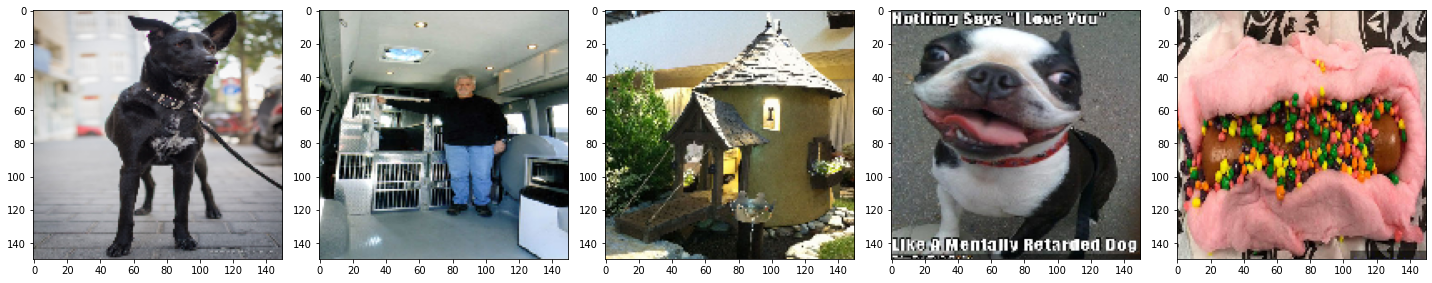

In [23]:
images = [train_data_gen[0][0][i] for i in range(5)]
plotImages(images)